In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
data = pd.read_csv('Loan_Data.csv')
df = data.copy()
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
df = df.drop('Loan_ID', axis = 1)
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [47]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:

cat = df.select_dtypes(exclude = "number")
num = df.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Date')
display(cat.head())

Numerical Data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0




Categorical Date


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [49]:
new_cat = df.select_dtypes(exclude = "number")
new_num = df.select_dtypes(include = 'number')

print('Numerical Data')
display(new_num.head())
print(f'\n\nCategorical Date')
display(new_cat.head())

Numerical Data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0




Categorical Date


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [50]:
for i in df.columns:
    if ((df[i].isnull().sum() / len(df)) * 100) < 30:
        if df[i].dtypes != 'O':
            df[i].fillna(df[i].median(), inplace = True)
        else:
            df[i].fillna(df[i].mode()[0], inplace = True)
    else:
        df.drop(i, axis = 1, inplace = True)

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
columns_to_scale = []
for i in new_num.columns:
    if df[i].describe()[2] > 1500:
        columns_to_scale.append(i)

columns_to_scale

['ApplicantIncome', 'CoapplicantIncome']

In [52]:
from sklearn.preprocessing import StandardScaler
import joblib

scaled = {}

for i in columns_to_scale:
    scale = StandardScaler()
    df[i] = scale.fit_transform(df[[i]])
    joblib.dump(scale, open(f'{i}_scaler.pkl', 'wb'))
    scaled[i + '_scaler'] = scale

scaled

{'ApplicantIncome_scaler': StandardScaler(),
 'CoapplicantIncome_scaler': StandardScaler()}

In [53]:
from sklearn.preprocessing import LabelEncoder

encoded = {}  
for i in cat.columns: 
    encode = LabelEncoder() 
    df[i] = encode.fit_transform(df[i])
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb'))
    encoded[i +'_encoder'] = encode

encoded

{'Gender_encoder': LabelEncoder(),
 'Married_encoder': LabelEncoder(),
 'Dependents_encoder': LabelEncoder(),
 'Education_encoder': LabelEncoder(),
 'Self_Employed_encoder': LabelEncoder(),
 'Property_Area_encoder': LabelEncoder(),
 'Loan_Status_encoder': LabelEncoder()}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

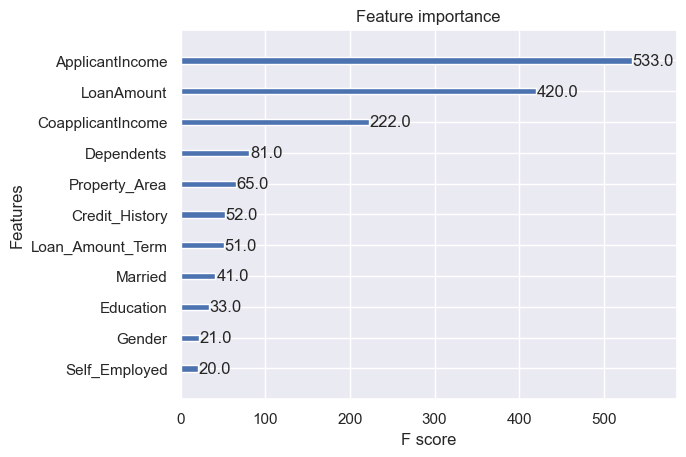

In [54]:
import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBClassifier()

x = df.drop('Loan_Status', axis = 1)
y = df.Loan_Status

model.fit(x, y)
xgb.plot_importance(model, importance_type = 'weight')

In [55]:
sel_cols = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents', 'Property_Area',
            'Credit_History', 'Loan_Amount_Term', 'Loan_Status']

df = df[sel_cols]
df.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
0,0.072991,128.0,-0.554487,0,2,1.0,360.0,1
1,-0.134412,128.0,-0.038732,1,0,1.0,360.0,0
2,-0.393747,66.0,-0.554487,0,2,1.0,360.0,1
3,-0.462062,120.0,0.251980,0,2,1.0,360.0,1
4,0.097728,141.0,-0.554487,0,2,1.0,360.0,1


In [56]:
from sklearn.model_selection import train_test_split

x = df.drop('Loan_Status', axis = 1)
y = df.Loan_Status

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 90)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (491, 7)
Xtest: (123, 7)
Ytrain: (491,)
Ytest: (123,)


,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
241,-0.474022,140.0,0.123725,1,2,1.0,180.0,0
39,-0.271206,110.0,0.015991,0,1,1.0,360.0,1
431,0.179641,105.0,-0.554487,0,0,0.0,360.0,0
103,-0.123108,128.0,0.670946,0,1,1.0,360.0,1
140,-0.059216,185.0,0.157926,2,0,1.0,360.0,0
...,...,...,...,...,...,...,...,...
74,-0.022519,187.0,0.052244,3,1,1.0,360.0,1
402,-0.475660,103.0,6.285775,0,1,1.0,360.0,1
570,-0.325432,186.0,0.044036,1,2,1.0,360.0,1
452,-0.238441,149.0,0.038221,0,0,0.0,360.0,0


<Axes: xlabel='Loan_Status', ylabel='count'>

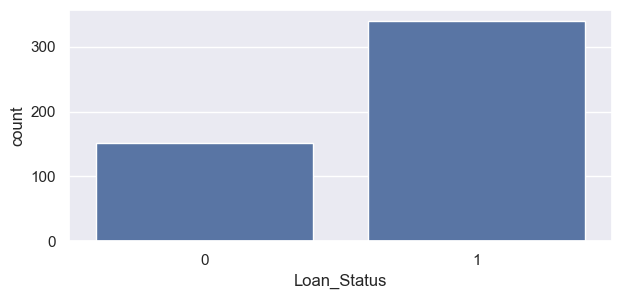

In [57]:
training_data = pd.concat([xtrain, ytrain], axis = 1)
plt.figure(figsize = (7,3))

display(training_data)
sns.countplot(x = training_data['Loan_Status'])

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
241,-0.474022,140.0,0.123725,1,2,1.0,180.0,0
431,0.179641,105.0,-0.554487,0,0,0.0,360.0,0
140,-0.059216,185.0,0.157926,2,0,1.0,360.0,0
414,-0.533163,178.0,0.552609,0,1,0.0,360.0,0
553,-0.483196,181.0,0.243429,0,2,0.0,360.0,0
...,...,...,...,...,...,...,...,...
238,-0.260721,112.0,-0.554487,1,0,1.0,360.0,1
451,-0.564453,60.0,-0.056516,2,2,1.0,300.0,1
12,-0.381788,200.0,2.217871,2,2,1.0,360.0,1
33,-0.311835,114.0,0.015649,0,1,1.0,360.0,1


<Axes: xlabel='Loan_Status', ylabel='count'>

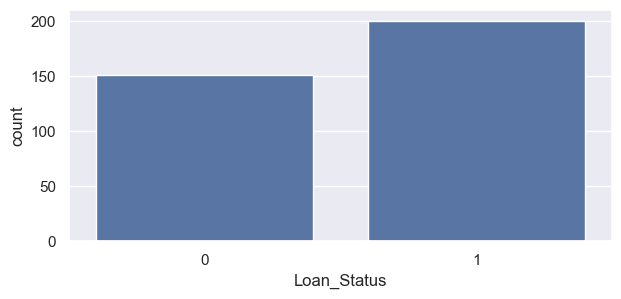

In [58]:
class0 = training_data.loc[training_data['Loan_Status'] == 0]
class1 = training_data.loc[training_data['Loan_Status'] == 1]

new_class1 = class1.sample(200)

new_training_data = pd.concat([class0, new_class1], axis = 0)

display(new_training_data)
plt.figure(figsize = (7,3))
sns.set(style= 'darkgrid')
sns.countplot(x = new_training_data['Loan_Status'])

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
xgb_model = xgb.XGBClassifier()

x = new_training_data.drop('Loan_Status', axis = 1)
y = new_training_data['Loan_Status']

xgb_model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
from sklearn.metrics import classification_report

cv = xgb_model.predict(xtest)
print(classification_report(cv,ytest))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        42
           1       0.78      0.79      0.79        81

    accuracy                           0.72       123
   macro avg       0.68      0.68      0.68       123
weighted avg       0.71      0.72      0.71       123



In [61]:
model = joblib.dump(xgb_model,open('LoanModell.pkl','wb'))

In [62]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression()

# log_reg.fit(xtrain, ytrain)

In [63]:
# from sklearn.metrics import classification_report, confusion_matrix

# cv = log_reg.predict(xtrain)
# print(classification_report(cv, ytrain))

In [64]:
# sns.countplot(x = df.Loan_Status)